In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import torch 
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

## Zadanie 1

Train the neural network on the data from file `data.npy`. 

In [2]:
data = np.loadtxt('data.npy').astype('float32')

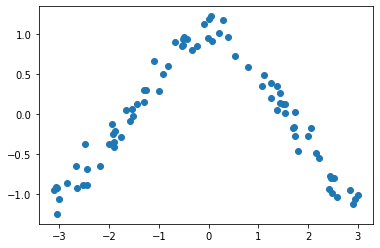

In [3]:
plt.scatter(data[:,0], data[:,1]);

In [4]:
t_xs = torch.from_numpy(data[:,0]).view(-1,1)
t_ys = torch.from_numpy(data[:,1]).view(-1,1)

In [5]:
model = torch.nn.Sequential(torch.nn.Linear(1,10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10,1))

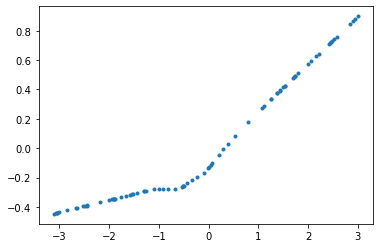

In [6]:
t_out = model(t_xs)
plt.plot(t_xs.view(-1).numpy(), t_out.data.view(-1).numpy(),'.');

In [7]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)

In [8]:
loader = torch.utils.data.DataLoader(dataset,batch_size=len(dataset))

In [9]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

In [10]:
loss_func = torch.nn.MSELoss()

In [14]:
%%time
for epoch in range(200):    
    for features, target in loader:
        optimizer.zero_grad()
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    if epoch%10 == 0:
        print("epoch %d %f" % (epoch, loss.item()))   

epoch 0 0.832037
epoch 10 0.242049
epoch 20 0.106680
epoch 30 0.047708
epoch 40 0.026779
epoch 50 0.020315
epoch 60 0.018438
epoch 70 0.017838
epoch 80 0.017577
epoch 90 0.017418
epoch 100 0.017302
epoch 110 0.017211
epoch 120 0.017141
epoch 130 0.017085
epoch 140 0.017038
epoch 150 0.016999
epoch 160 0.016966
epoch 170 0.016937
epoch 180 0.016914
epoch 190 0.016888
Wall time: 885 ms
